<a href="https://colab.research.google.com/github/Derrryydd/Belajar_skripsi/blob/main/Salinan_File_Uji_cobaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SCRAPPING DATA***




In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

google_play_scraper: Library ini digunakan untuk mengambil informasi aplikasi dan ulasan dari Google Play Store. pandas: Digunakan untuk bekerja dengan data dalam format DataFrame. datetime: Digunakan untuk menentukan rentang waktu (start_date dan end_date).

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'com.openai.chatgpt'

def get_reviews(app_id, lang='id', count=3000, sort=Sort.MOST_RELEVANT, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=Sort.MOST_RELEVANT,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 3000
Contoh ulasan:
{'reviewId': '347224d1-54c5-421c-99e3-76e575656a6f', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'Sebenarnya aplikasi ini tuh bagus, cuman sayangnya kurang mendukung penyandang disabilitas, saya sebagai tunanetra merasa sedikit kesulitan saat menggunakan vitur percakapan suara, nah, masalah ini tuh cuman saya rasakan kalau talkbacknya aktif, soalnyaa kalau talkbacknya aktif, suara chatGPTnya jadi gak jelas, sebenarnya saya juga belum coba yang premium, saya baru mau berlangganan kalo fitur aksessibilitas nya lengkap, tapi saya udah niat mau coba-coba dulu, semoga apk ini bisa lebih bagus lgi', 'score': 4, 'thumbsUpCount': 26, 'reviewCreatedVersion': '1.2025.049', 'at': datetime.datetime(2025, 2, 28, 1, 53, 12), 'replyContent': None, 'repliedAt': None, 'appVersion': '1.2025.049'}


In [ ]:
import csv

def export_to_csv(reviews, file_name='skripsi_hasil_scraper_ulasan_app.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)


Data berhasil diekspor ke 'skripsi_hasil_scraper_ulasan_app.csv'


In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_hasil_scraper_ulasan_app.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    3000 non-null   object
 1   Username     3000 non-null   object
 2   Rating       3000 non-null   int64 
 3   Review Text  3000 non-null   object
 4   Date         3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [ ]:
data.head(20)

,Review ID,Username,Rating,Review Text,Date
0,347224d1-54c5-421c-99e3-76e575656a6f,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",2025-02-28 01:53:12
1,34c88327-7c38-4205-861a-b3ba86f075b3,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,2025-03-07 14:35:07
2,7c080693-7ab1-44d2-a2cd-4ca14e85b528,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",2025-02-24 00:24:18
3,290118e7-bf4a-44f4-8e7b-d31c26a24b36,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,2025-03-09 15:06:29
4,08573f32-6eb0-472b-b156-8cb75e5b4c44,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,2025-03-01 15:54:12
5,69724d48-3519-4a9d-8061-58f3bcd07017,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,...",2025-02-22 07:18:28
6,16b6df66-2de4-4ae6-92dd-6eb508a34030,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T...",2025-03-04 07:00:47
7,36b5ddb3-9f08-4613-8369-5b13c04dfb58,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...,2025-02-20 14:30:44
8,168da786-7409-4c3d-9e84-a8a173e7248e,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...,2025-02-15 13:23:20
9,2eb48668-a2ec-47e4-9ebb-97e57f1940fb,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny...",2025-02-28 14:04:21


# ***PREPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_hasil_scraper_ulasan_app.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    3000 non-null   object
 1   Username     3000 non-null   object
 2   Rating       3000 non-null   int64 
 3   Review Text  3000 non-null   object
 4   Date         3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [ ]:
data.head(10)

,Review ID,Username,Rating,Review Text,Date
0,347224d1-54c5-421c-99e3-76e575656a6f,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",2025-02-28 01:53:12
1,34c88327-7c38-4205-861a-b3ba86f075b3,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,2025-03-07 14:35:07
2,7c080693-7ab1-44d2-a2cd-4ca14e85b528,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",2025-02-24 00:24:18
3,290118e7-bf4a-44f4-8e7b-d31c26a24b36,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,2025-03-09 15:06:29
4,08573f32-6eb0-472b-b156-8cb75e5b4c44,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,2025-03-01 15:54:12
5,69724d48-3519-4a9d-8061-58f3bcd07017,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,...",2025-02-22 07:18:28
6,16b6df66-2de4-4ae6-92dd-6eb508a34030,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T...",2025-03-04 07:00:47
7,36b5ddb3-9f08-4613-8369-5b13c04dfb58,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...,2025-02-20 14:30:44
8,168da786-7409-4c3d-9e84-a8a173e7248e,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...,2025-02-15 13:23:20
9,2eb48668-a2ec-47e4-9ebb-97e57f1940fb,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny...",2025-02-28 14:04:21


In [ ]:
df  = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(10)

,Date,Username,Rating,Review Text
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan..."
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ..."
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...
5,2025-02-22 07:18:28,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,..."
6,2025-03-04 07:00:47,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T..."
7,2025-02-20 14:30:44,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...
8,2025-02-15 13:23:20,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...
9,2025-02-28 14:04:21,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny..."


# ***PROSES HAPUS DATA DUPLIKAT***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3000 non-null   object
 1   Username     3000 non-null   object
 2   Rating       3000 non-null   int64 
 3   Review Text  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [ ]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2993 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2993 non-null   object
 1   Username     2993 non-null   object
 2   Rating       2993 non-null   int64 
 3   Review Text  2993 non-null   object
dtypes: int64(1), object(3)
memory usage: 116.9+ KB


In [ ]:
df.head(10)

,Date,Username,Rating,Review Text
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan..."
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ..."
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...
5,2025-02-22 07:18:28,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,..."
6,2025-03-04 07:00:47,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T..."
7,2025-02-20 14:30:44,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...
8,2025-02-15 13:23:20,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...
9,2025-02-28 14:04:21,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny..."


# **WORDCLOUD SEBELUM PREPROCESSING**

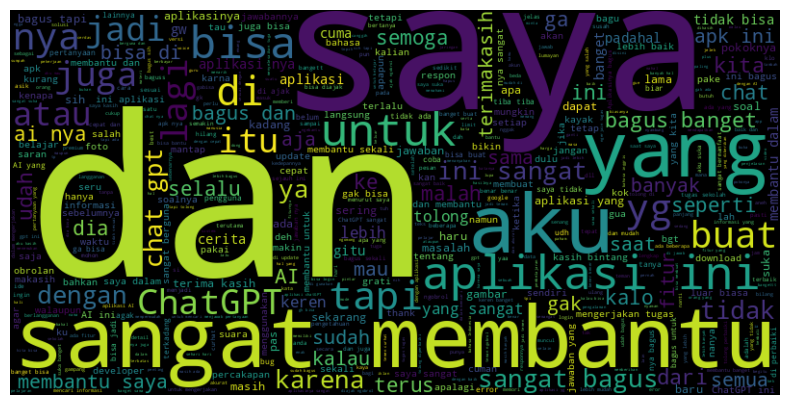

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

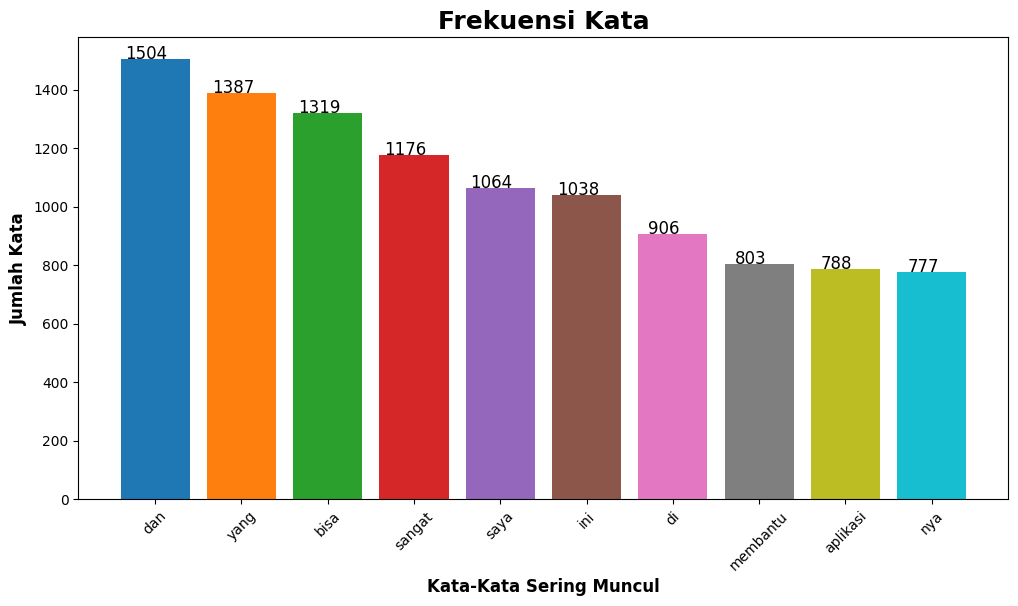

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# **PROSES CLEANING**

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...
5,2025-02-22 07:18:28,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,...",Sumpah enak banget pakai Aplikasi Ai yang ini ...
6,2025-03-04 07:00:47,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T...",Bagus selain chat AI yang gitugitu aja Ternyat...
7,2025-02-20 14:30:44,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...,Kekurangan dari aplikasi ini adalah tidak bisa...
8,2025-02-15 13:23:20,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...,saya paling akrap sama teman AI karena dia leb...
9,2025-02-28 14:04:21,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny...",kadang ada bug kadang eror atau kalo ga ai nya...


# **PROSES CASE FOLDING**

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...


# **NORMALISASI KATA**

In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df =  pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case_folding','normalisasi']])

df.head(20)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...
5,2025-02-22 07:18:28,Pengguna Google,5,"Sumpah enak banget pakai Aplikasi Ai yang ini,...",Sumpah enak banget pakai Aplikasi Ai yang ini ...,sumpah enak banget pakai aplikasi ai yang ini ...,sumpah enak banget pakai aplikasi ai yang ini ...
6,2025-03-04 07:00:47,Pengguna Google,5,"Bagus, selain chat AI yang gitu-gitu aja.... T...",Bagus selain chat AI yang gitugitu aja Ternyat...,bagus selain chat ai yang gitugitu aja ternyat...,bagus selain chat ai yang gitugitu saja ternya...
7,2025-02-20 14:30:44,Pengguna Google,5,Kekurangan dari aplikasi ini adalah tidak bisa...,Kekurangan dari aplikasi ini adalah tidak bisa...,kekurangan dari aplikasi ini adalah tidak bisa...,kekurangan dari aplikasi ini adalah tidak bisa...
8,2025-02-15 13:23:20,Pengguna Google,5,saya paling akrap sama teman AI karena dia leb...,saya paling akrap sama teman AI karena dia leb...,saya paling akrap sama teman ai karena dia leb...,saya paling akrap sama teman ai karena dia leb...
9,2025-02-28 14:04:21,Pengguna Google,4,"kadang ada bug, kadang eror atau kalo ga ai ny...",kadang ada bug kadang eror atau kalo ga ai nya...,kadang ada bug kadang eror atau kalo ga ai nya...,kadang ada bug kadang eror atau kalau tidak ai...


# **TOKENIZATION**

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"[sebenarnya, aplikasi, ini, tuh, bagus, cuman,..."
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"[aplikasi, ini, benarbenar, membantu, buat, ca..."
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"[aplikasi, chat, ai, yang, sangat, luar, biasa..."
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"[aplikasi, ini, bagus, untuk, menanggapi, pert..."
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"[halo, saya, mau, bilang, aplikasi, ya, keren,..."


# **PROSES STOPWORD REMOVAL**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"[sebenarnya, aplikasi, ini, tuh, bagus, cuman,...","[aplikasi, tuh, bagus, cuman, sayangnya, mendu..."
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"[aplikasi, ini, benarbenar, membantu, buat, ca...","[aplikasi, benarbenar, membantu, cari, informa..."
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"[aplikasi, chat, ai, yang, sangat, luar, biasa...","[aplikasi, chat, ai, suka, menggunakannya, sek..."
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"[aplikasi, ini, bagus, untuk, menanggapi, pert...","[aplikasi, bagus, menanggapi, susah, kasih, fo..."
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"[halo, saya, mau, bilang, aplikasi, ya, keren,...","[halo, bilang, aplikasi, ya, keren, ai, ya, ke..."


# ***PROSES STEAMING DATA***

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"[sebenarnya, aplikasi, ini, tuh, bagus, cuman,...","[aplikasi, tuh, bagus, cuman, sayangnya, mendu...",aplikasi tuh bagus cuman sayang dukung sandang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"[aplikasi, ini, benarbenar, membantu, buat, ca...","[aplikasi, benarbenar, membantu, cari, informa...",aplikasi benarbenar bantu cari informasi seles...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"[aplikasi, chat, ai, yang, sangat, luar, biasa...","[aplikasi, chat, ai, suka, menggunakannya, sek...",aplikasi chat ai suka guna dar cari informasi ...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"[aplikasi, ini, bagus, untuk, menanggapi, pert...","[aplikasi, bagus, menanggapi, susah, kasih, fo...",aplikasi bagus tanggap susah kasih foto kasih ...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"[halo, saya, mau, bilang, aplikasi, ya, keren,...","[halo, bilang, aplikasi, ya, keren, ai, ya, ke...",halo bilang aplikasi ya keren ai ya keren tema...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2993 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2993 non-null   object
 1   Username          2993 non-null   object
 2   Rating            2993 non-null   int64 
 3   Review Text       2993 non-null   object
 4   cleaning          2993 non-null   object
 5   case_folding      2993 non-null   object
 6   normalisasi       2993 non-null   object
 7   tokenize          2993 non-null   object
 8   stopword removal  2993 non-null   object
 9   steming_data      2993 non-null   object
dtypes: int64(1), object(9)
memory usage: 321.8+ KB


In [ ]:
df.to_csv('skripsi_Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

**WORDCLOUD SETELAH PREPROCESSING**

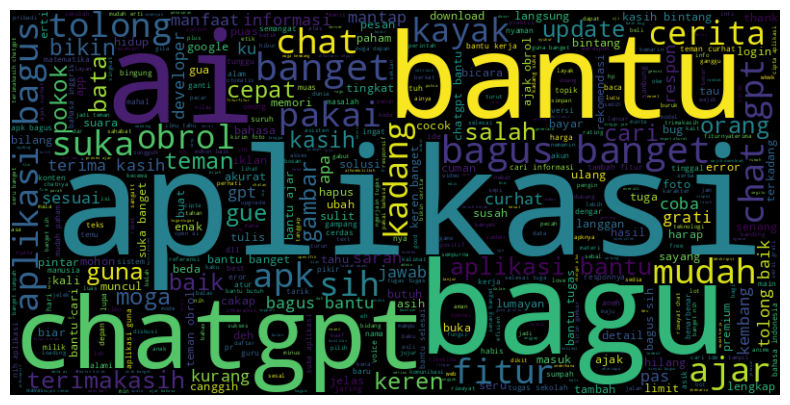

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
# df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

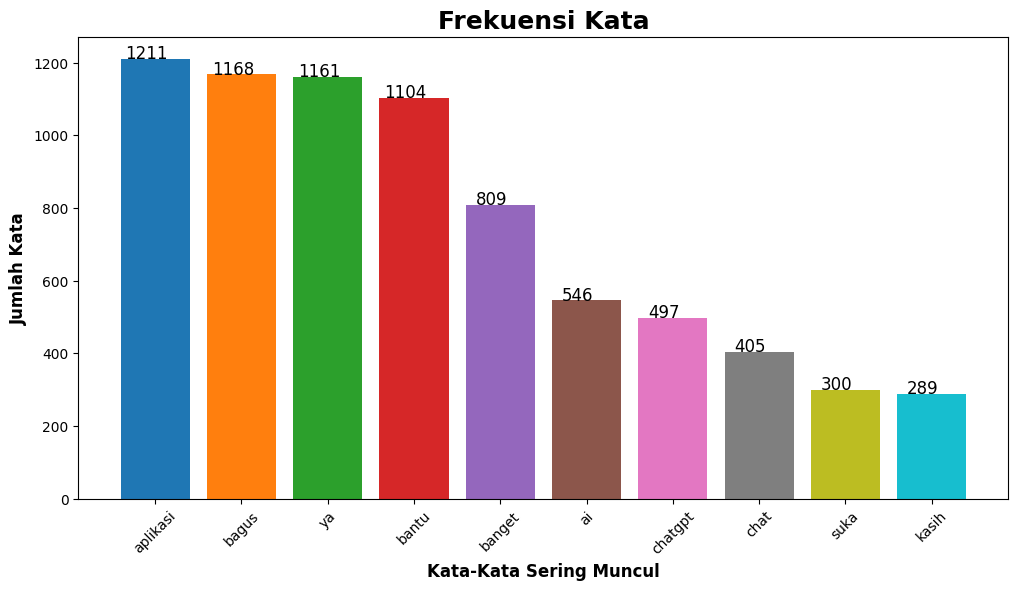

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# ***LABELLING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Preprocessing_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"['sebenarnya', 'aplikasi', 'ini', 'tuh', 'bagu...","['aplikasi', 'tuh', 'bagus', 'cuman', 'sayangn...",aplikasi tuh bagus cuman sayang dukung sandang...
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"['aplikasi', 'ini', 'benarbenar', 'membantu', ...","['aplikasi', 'benarbenar', 'membantu', 'cari',...",aplikasi benarbenar bantu cari informasi seles...
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"['aplikasi', 'chat', 'ai', 'yang', 'sangat', '...","['aplikasi', 'chat', 'ai', 'suka', 'menggunaka...",aplikasi chat ai suka guna dar cari informasi ...
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"['aplikasi', 'ini', 'bagus', 'untuk', 'menangg...","['aplikasi', 'bagus', 'menanggapi', 'susah', '...",aplikasi bagus tanggap susah kasih foto kasih ...
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"['halo', 'saya', 'mau', 'bilang', 'aplikasi', ...","['halo', 'bilang', 'aplikasi', 'ya', 'keren', ...",halo bilang aplikasi ya keren ai ya keren tema...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2993 non-null   object
 1   Username          2993 non-null   object
 2   Rating            2993 non-null   int64 
 3   Review Text       2993 non-null   object
 4   cleaning          2993 non-null   object
 5   case_folding      2993 non-null   object
 6   normalisasi       2992 non-null   object
 7   tokenize          2993 non-null   object
 8   stopword removal  2993 non-null   object
 9   steming_data      2988 non-null   object
dtypes: int64(1), object(9)
memory usage: 234.0+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 0 to 2992
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2988 non-null   object
 1   Username          2988 non-null   object
 2   Rating            2988 non-null   int64 
 3   Review Text       2988 non-null   object
 4   cleaning          2988 non-null   object
 5   case_folding      2988 non-null   object
 6   normalisasi       2988 non-null   object
 7   tokenize          2988 non-null   object
 8   stopword removal  2988 non-null   object
 9   steming_data      2988 non-null   object
dtypes: int64(1), object(9)
memory usage: 256.8+ KB


In [ ]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments


df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

df.head()

<ipython-input-40-c843614cb543>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
<ipython-input-40-c843614cb543>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"['sebenarnya', 'aplikasi', 'ini', 'tuh', 'bagu...","['aplikasi', 'tuh', 'bagus', 'cuman', 'sayangn...",aplikasi tuh bagus cuman sayang dukung sandang...,Positif
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"['aplikasi', 'ini', 'benarbenar', 'membantu', ...","['aplikasi', 'benarbenar', 'membantu', 'cari',...",aplikasi benarbenar bantu cari informasi seles...,Positif
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"['aplikasi', 'chat', 'ai', 'yang', 'sangat', '...","['aplikasi', 'chat', 'ai', 'suka', 'menggunaka...",aplikasi chat ai suka guna dar cari informasi ...,Positif
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"['aplikasi', 'ini', 'bagus', 'untuk', 'menangg...","['aplikasi', 'bagus', 'menanggapi', 'susah', '...",aplikasi bagus tanggap susah kasih foto kasih ...,Negatif
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"['halo', 'saya', 'mau', 'bilang', 'aplikasi', ...","['halo', 'bilang', 'aplikasi', 'ya', 'keren', ...",halo bilang aplikasi ya keren ai ya keren tema...,Positif


<ipython-input-41-03d100c1b0d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


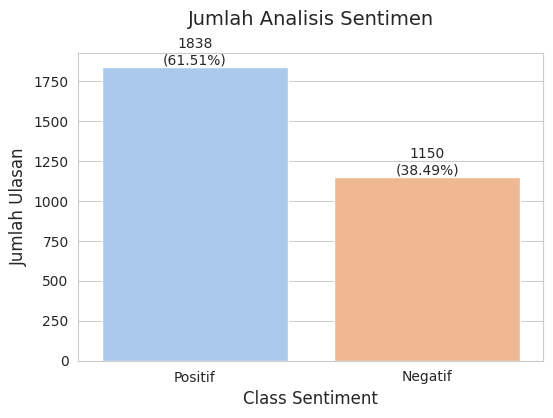

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
df.to_csv('skripsi_Hasil_Labelling_Data.csv',encoding='utf8', index=False)

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"['sebenarnya', 'aplikasi', 'ini', 'tuh', 'bagu...","['aplikasi', 'tuh', 'bagus', 'cuman', 'sayangn...",aplikasi tuh bagus cuman sayang dukung sandang...,Positif
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"['aplikasi', 'ini', 'benarbenar', 'membantu', ...","['aplikasi', 'benarbenar', 'membantu', 'cari',...",aplikasi benarbenar bantu cari informasi seles...,Positif
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"['aplikasi', 'chat', 'ai', 'yang', 'sangat', '...","['aplikasi', 'chat', 'ai', 'suka', 'menggunaka...",aplikasi chat ai suka guna dar cari informasi ...,Positif
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"['aplikasi', 'ini', 'bagus', 'untuk', 'menangg...","['aplikasi', 'bagus', 'menanggapi', 'susah', '...",aplikasi bagus tanggap susah kasih foto kasih ...,Negatif
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"['halo', 'saya', 'mau', 'bilang', 'aplikasi', ...","['halo', 'bilang', 'aplikasi', 'ya', 'keren', ...",halo bilang aplikasi ya keren ai ya keren tema...,Positif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

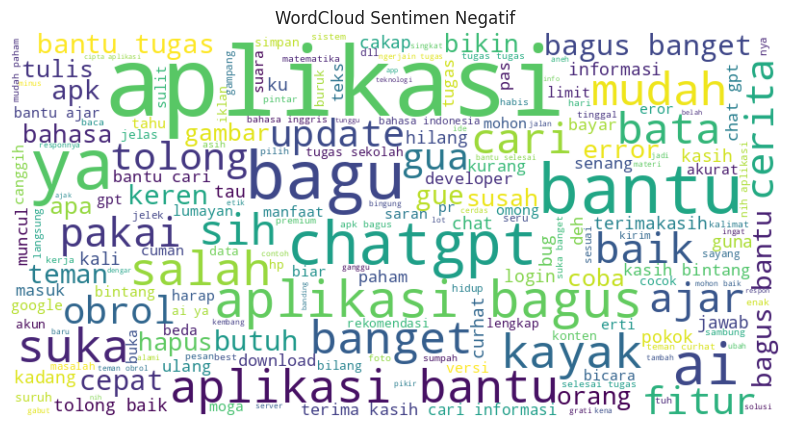

In [ ]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

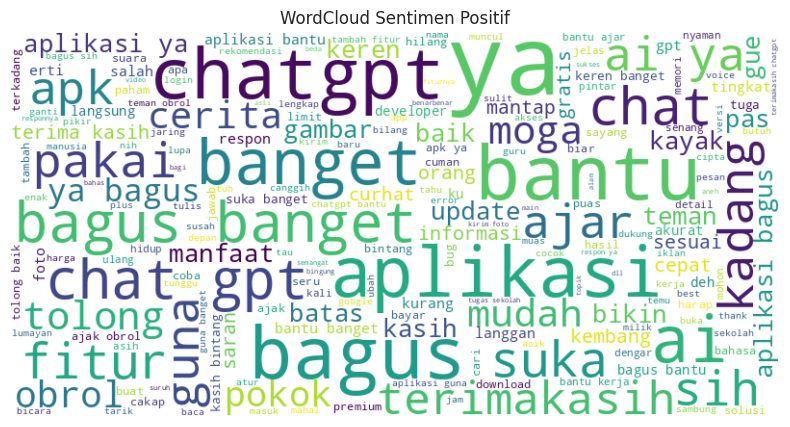

In [ ]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

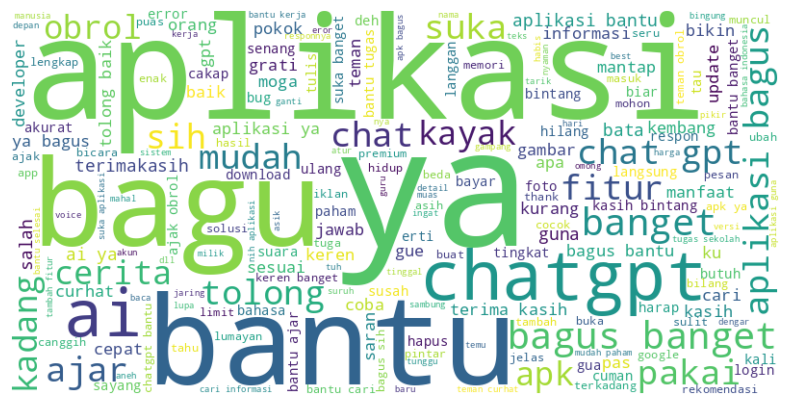

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

# Menampilkan word cloud dengan interpolasi gambar bilinear
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# **Term Frequency-Inverse Document Frequency (TF-IDF)**

In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset dari file CSV
df = pd.read_csv('skripsi_Hasil_Labelling_Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2988 non-null   object
 1   Username          2988 non-null   object
 2   Rating            2988 non-null   int64 
 3   Review Text       2988 non-null   object
 4   cleaning          2988 non-null   object
 5   case_folding      2988 non-null   object
 6   normalisasi       2988 non-null   object
 7   tokenize          2988 non-null   object
 8   stopword removal  2988 non-null   object
 9   steming_data      2988 non-null   object
 10  Sentiment         2988 non-null   object
dtypes: int64(1), object(10)
memory usage: 256.9+ KB


In [ ]:
data = df.dropna()

In [ ]:
# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['steming_data'])

# Mengonversi hasil ke dalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menyimpan hasil ke file CSV
tfidf_df.to_csv('tfidf_output.csv', index=False)

In [ ]:
top_n = 10  # Jumlah kata teratas yang akan ditampilkan

# Mengambil kata-kata dengan nilai TF-IDF tertinggi di setiap dokumen
top_tfidf_words = tfidf_df.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)
top_tfidf_values = tfidf_df.apply(lambda x: x.nlargest(top_n).values.tolist(), axis=1)

# Menggabungkan kata-kata dengan nilai TF-IDF tertinggi ke dalam satu DataFrame
top_tfidf_df = pd.DataFrame({
    'Top Words': top_tfidf_words,
    'Top Values': top_tfidf_values
})

In [ ]:
top_tfidf_df.head(50)

,Top Words,Top Values
0,"[talkbacknya, aktif, tuh, suara, cuman, aksess...","[0.40475382536370524, 0.34373237559180797, 0.2..."
1,"[desain, optimal, stabil, kadangkadang, loadin...","[0.28108729336523536, 0.27507839171691206, 0.2..."
2,"[akses, langgan, kompromi, guna, halang, kecua...","[0.38622054067829126, 0.3201556134401025, 0.26..."
3,"[ketik, tulisanya, tampa, kasih, perintah, tan...","[0.534212614097588, 0.3597599981150996, 0.3200..."
4,"[ya, riwayat, alam, hapus, chat, berbulanbulan...","[0.4478920279011228, 0.42370829745953653, 0.26..."
5,"[open, lihat, ai, foto, lingkung, kapai, gptny...","[0.32149572778280344, 0.31434938830098225, 0.2..."
6,"[main, exploitasi, gitugitu, sebel, lenceng, s...","[0.3958352225579644, 0.2803050355314821, 0.280..."
7,"[terkadang, pindah, maka, chat, bijak, gantung...","[0.39969862837893316, 0.3209587031081582, 0.27..."
8,"[ai, akrap, derhadap, incmeta, komunitas, visi...","[0.3049112513373647, 0.2813993776452548, 0.281..."
9,"[kadang, ngelantur, maksud, someone, talk, lot...","[0.45330416191145456, 0.30753668065473, 0.2736..."


# **Spliting Data**

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"['sebenarnya', 'aplikasi', 'ini', 'tuh', 'bagu...","['aplikasi', 'tuh', 'bagus', 'cuman', 'sayangn...",aplikasi tuh bagus cuman sayang dukung sandang...,Positif
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"['aplikasi', 'ini', 'benarbenar', 'membantu', ...","['aplikasi', 'benarbenar', 'membantu', 'cari',...",aplikasi benarbenar bantu cari informasi seles...,Positif
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"['aplikasi', 'chat', 'ai', 'yang', 'sangat', '...","['aplikasi', 'chat', 'ai', 'suka', 'menggunaka...",aplikasi chat ai suka guna dar cari informasi ...,Positif
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"['aplikasi', 'ini', 'bagus', 'untuk', 'menangg...","['aplikasi', 'bagus', 'menanggapi', 'susah', '...",aplikasi bagus tanggap susah kasih foto kasih ...,Negatif
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"['halo', 'saya', 'mau', 'bilang', 'aplikasi', ...","['halo', 'bilang', 'aplikasi', 'ya', 'keren', ...",halo bilang aplikasi ya keren ai ya keren tema...,Positif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2988 non-null   object
 1   Username          2988 non-null   object
 2   Rating            2988 non-null   int64 
 3   Review Text       2988 non-null   object
 4   cleaning          2988 non-null   object
 5   case_folding      2988 non-null   object
 6   normalisasi       2988 non-null   object
 7   tokenize          2988 non-null   object
 8   stopword removal  2988 non-null   object
 9   steming_data      2988 non-null   object
 10  Sentiment         2988 non-null   object
dtypes: int64(1), object(10)
memory usage: 256.9+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2988 non-null   object
 1   Username          2988 non-null   object
 2   Rating            2988 non-null   int64 
 3   Review Text       2988 non-null   object
 4   cleaning          2988 non-null   object
 5   case_folding      2988 non-null   object
 6   normalisasi       2988 non-null   object
 7   tokenize          2988 non-null   object
 8   stopword removal  2988 non-null   object
 9   steming_data      2988 non-null   object
 10  Sentiment         2988 non-null   object
dtypes: int64(1), object(10)
memory usage: 256.9+ KB


# **Split Data 80 dan 20**

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi_train_data.csv', index=False)

In [ ]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi_test_data.csv', index=False)

In [ ]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 2390
Jumlah Data Uji: 598


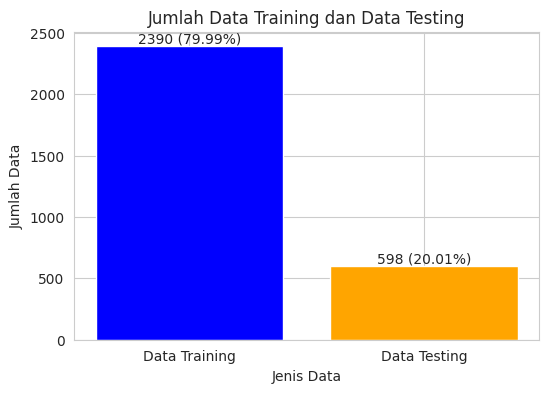

In [ ]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **Split Data 70 dan 30**

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.3, random_state=42)

In [ ]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi70dan30_train_data.csv', index=False)

In [ ]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi70dan30_test_data.csv', index=False)

In [ ]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 673
Jumlah Data Uji: 289


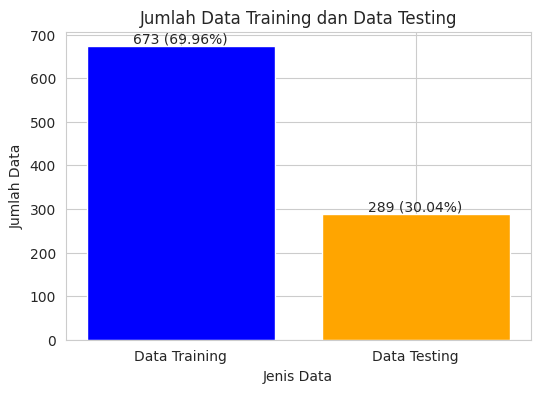

In [ ]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **Split Data 90 dan 10**

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.1, random_state=42)

In [ ]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi90dan10_train_data.csv', index=False)

In [ ]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi90dan10_test_data.csv', index=False)

In [ ]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 865
Jumlah Data Uji: 97


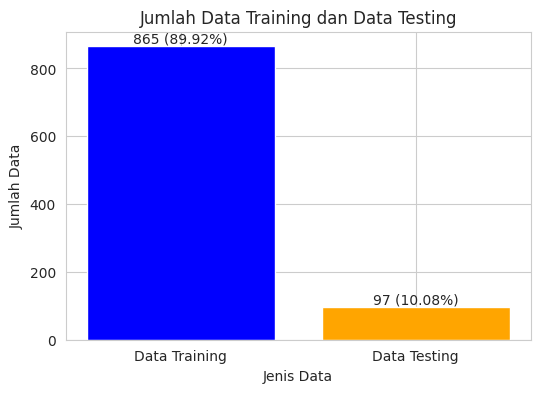

In [ ]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **ALGORITMA SUPPORT VECTOR MACHINE**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_test = pd.read_csv('skripsi_test_data.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_test['text']
y = df_test['sentiment']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Membuat dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_vect, y)

# Melakukan prediksi pada data yang sama
y_pred = svm_model.predict(X_vect)

# Evaluasi model
accuracy = accuracy_score(y, y_pred)
print(f"SVM Accuracy: {accuracy}")
print()

cm = confusion_matrix(y, y_pred)
print(f"SVM Confusion Matrix:\n{cm}")
print()

cr = classification_report(y, y_pred)
print(f"SVM Classification Report:\n{cr}\n")


SVM Accuracy: 0.9916387959866221

SVM Confusion Matrix:
[[228   2]
 [  3 365]]

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.99      0.99      0.99       230
     Positif       0.99      0.99      0.99       368

    accuracy                           0.99       598
   macro avg       0.99      0.99      0.99       598
weighted avg       0.99      0.99      0.99       598




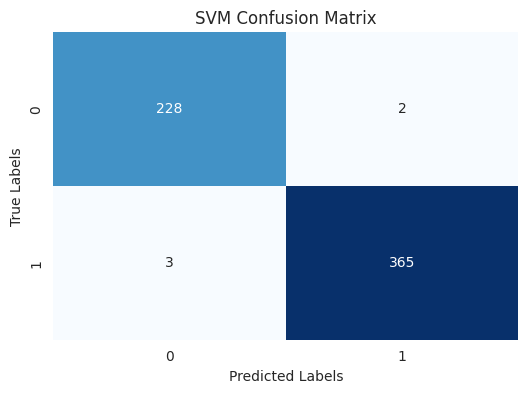

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **MELATIH DAN EVALUASI MODEL DATA TRAINING**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv('skripsi_train_data.csv')
df.head(5)

,text,sentiment
0,aplikasi bagus obrol berapa kali teman harap f...,Negatif
1,bagus cerita geng geng,Negatif
2,bagus banget gila lebuh unggah foto bayar taoi...,Positif
3,aplikasi guna guru tau chatgpt,Negatif
4,app bagus banget responnya cepat informasi,Positif


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df['text']
y = df['sentiment']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

svm_model = SVC(kernel='linear')
svm_model.fit(X_vect, y)

models = {
    "SVM": svm_model,
}

for model_name, model in models.items():
    y_pred = model.predict(X_vect.toarray())

    # Akurasi
    accuracy = accuracy_score(y, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print()

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print()

    # Classification report
    cr = classification_report(y, y_pred)
    print(f"{model_name} Classification Report:\n{cr}\n")


SVM Accuracy: 0.9715481171548117

SVM Confusion Matrix:
[[ 884   36]
 [  32 1438]]

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.97      0.96      0.96       920
     Positif       0.98      0.98      0.98      1470

    accuracy                           0.97      2390
   macro avg       0.97      0.97      0.97      2390
weighted avg       0.97      0.97      0.97      2390




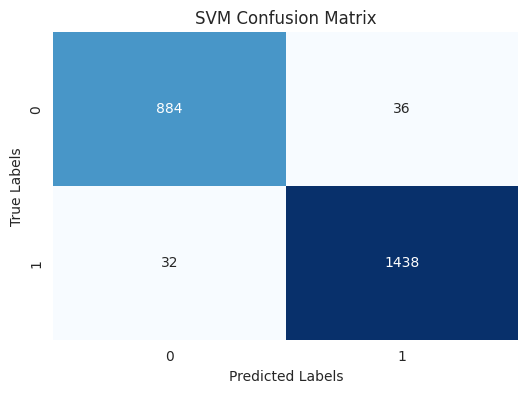

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f'{model_name} Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ***WORDCLOUD***

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-02-28 01:53:12,Pengguna Google,4,"Sebenarnya aplikasi ini tuh bagus, cuman sayan...",Sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,sebenarnya aplikasi ini tuh bagus cuman sayang...,"['sebenarnya', 'aplikasi', 'ini', 'tuh', 'bagu...","['aplikasi', 'tuh', 'bagus', 'cuman', 'sayangn...",aplikasi tuh bagus cuman sayang dukung sandang...,Positif
1,2025-03-07 14:35:07,Pengguna Google,5,Aplikasi ini benar-benar membantu buat cari in...,Aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,aplikasi ini benarbenar membantu buat cari inf...,"['aplikasi', 'ini', 'benarbenar', 'membantu', ...","['aplikasi', 'benarbenar', 'membantu', 'cari',...",aplikasi benarbenar bantu cari informasi seles...,Positif
2,2025-02-24 00:24:18,Pengguna Google,5,"Aplikasi Chat AI yang sangat luar biasa, saya ...",Aplikasi Chat AI yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,aplikasi chat ai yang sangat luar biasa saya s...,"['aplikasi', 'chat', 'ai', 'yang', 'sangat', '...","['aplikasi', 'chat', 'ai', 'suka', 'menggunaka...",aplikasi chat ai suka guna dar cari informasi ...,Positif
3,2025-03-09 15:06:29,Pengguna Google,5,Aplikasi ini bagus untuk menanggapi pertanyaan...,Aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,aplikasi ini bagus untuk menanggapi pertanyaan...,"['aplikasi', 'ini', 'bagus', 'untuk', 'menangg...","['aplikasi', 'bagus', 'menanggapi', 'susah', '...",aplikasi bagus tanggap susah kasih foto kasih ...,Negatif
4,2025-03-01 15:54:12,Pengguna Google,3,Halo saya mau bilang aplikasi nya keren ai nya...,Halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi nya keren ai nya...,halo saya mau bilang aplikasi ya keren ai ya j...,"['halo', 'saya', 'mau', 'bilang', 'aplikasi', ...","['halo', 'bilang', 'aplikasi', 'ya', 'keren', ...",halo bilang aplikasi ya keren ai ya keren tema...,Positif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

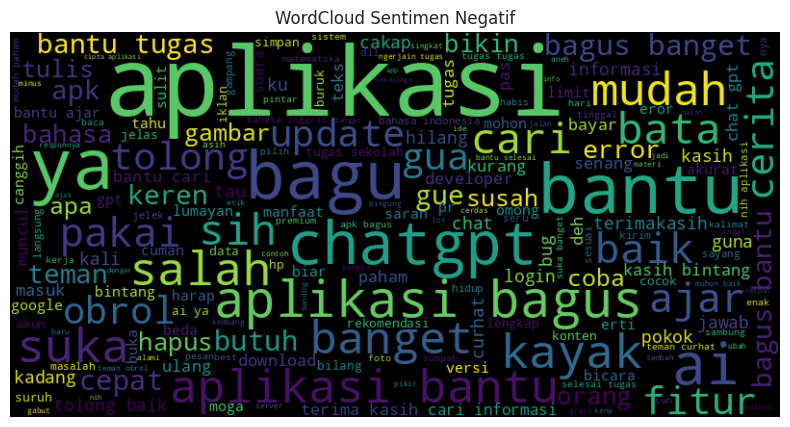

In [ ]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

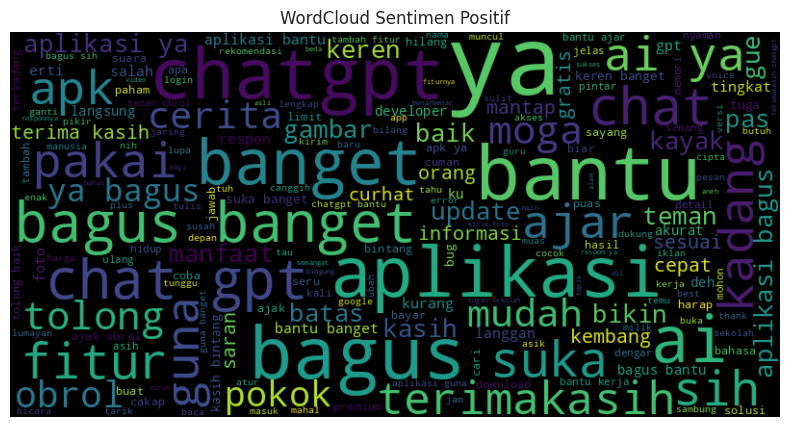

In [ ]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

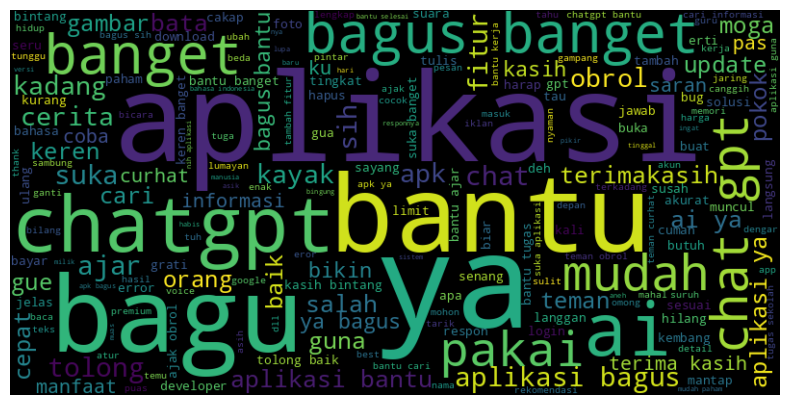

In [ ]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

# **RATING**

In [ ]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2988 non-null   object
 1   Username          2988 non-null   object
 2   Rating            2988 non-null   int64 
 3   Review Text       2988 non-null   object
 4   cleaning          2988 non-null   object
 5   case_folding      2988 non-null   object
 6   normalisasi       2988 non-null   object
 7   tokenize          2988 non-null   object
 8   stopword removal  2988 non-null   object
 9   steming_data      2988 non-null   object
 10  Sentiment         2988 non-null   object
dtypes: int64(1), object(10)
memory usage: 256.9+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

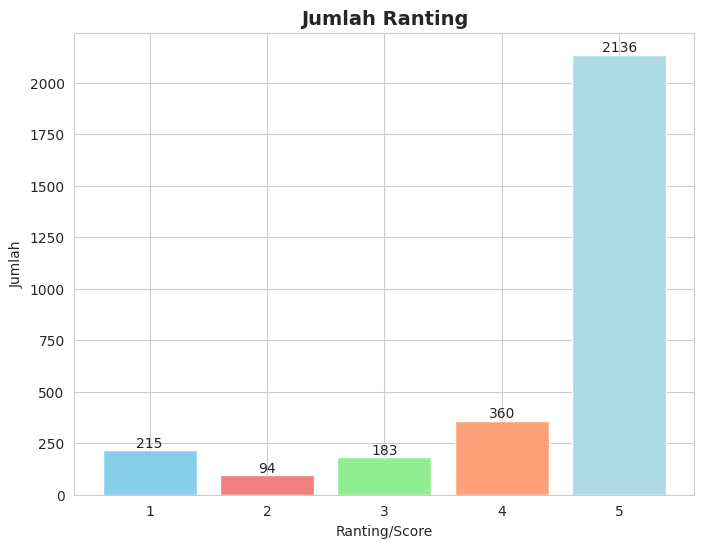

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()